# Sprint 9: Análisis de sentimiento y textos

# 1. Descripción

El análisis de sentimiento es una técnica de minería de datos y NLP (procesamiento de lenguaje natural) que permite evaluar la polaridad emocional de un texto o conjunto de datos. Esta técnica se utiliza en diversas industrias, como el marketing, la banca y las redes sociales, para comprender las opiniones y sentimientos de los consumidores hacia un producto, marca o tema en particular. Gran parte de los datos que podemos encontrar para analizar utilizando el aprendizaje automático son con textos libres,  los textos se clasifican en tres categorías básicas: positivo, negativo o neutral. 

Además, el análisis de sentimiento también permite analizar la frecuencia y la intensidad de las emociones, lo que es útil para identificar las tendencias y patrones en las opiniones de los consumidores.

En este sprint se aplicaran técnicas para analizar un texto, limpiarlos y realizar análisis de sentimientos.¶

<div class="alert alert-info alert-info"><b><h1>Objetivo</h1></b>
    
**Conocer las técnicas de análisis de sentimiento y de textos.**
</div>

<div class="alert alert-success alert-success"><b><h1>Actividades a realizar:</h1></b>

 **Ejercicio 1**: Seleccionar un texto en inglés y calcular la frecuencia de sus palabras.

 **Ejercicio 2** : Sacar los stopwords y realizar stemming en tu conjunto de datos.
    
 **Ejercicio 3** : Realizar sentimiento de analysis en tu conjunto de datos.
 
</div>

---

In [ ]:
!pip install nltk

In [126]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#import NLTK
import nltk
nltk.download('punkt') #Punkt es una biblioteca que se utiliza para tokenizar frases en lenguaje natural
nltk.download('stopwords') # library "stopwords"
nltk.download('wordnet') # 
nltk.download('omw-1.4') #
nltk.download('vader_lexicon') #

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

#import librerias de frecuencias
from nltk.probability import FreqDist

#import librerias de pre-procesamiento y normalizacion
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import librerias Sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.tokenize import RegexpTokenizer

#import libre¿aries for apply ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<div class="alert alert-block alert-info">
<b><h1> Ejercicio 1: Seleccionar un texto en inglés y calcular la frecuencia de sus palabras.</h1></b> 
</div>

# 2. Preparación de los datos

Se seleccionó el Capitulo 22 "The Path Is the Goal" del libro "When Things Fall Apart: Heart Advice for Difficult Times" de Pema Chodron. 

## 2.1 Selección del texto

In [7]:
text="""The Path Is the Goal.
If there’s any possibility for enlightenment, it is right now, not at some future time. Now is the time. What
does it take to use the life we already have in order to make us wiser rather than more stuck? What is the
source of wisdom, at a personal, individual level? 
HAT DOES IT take to use the life we already have in order to make us wiser rather than more stuck? What is the
source of wisdom, at a personal, individual level? To the degree that I have understood the teachings, the answer
to these questions seems to have to do with bringing everything that we encounter to the path. Everything naturally
has a ground, path, and fruition. This is like saying that everything has a beginning, a middle, and an end. But it is also
said that the path itself is both the ground and the fruition. So one sometimes reads, “The path is the goal.”
This path has one very distinct characteristic: it is not prefabricated. It doesn’t already exist. The path that we are
talking about is the moment-by-moment evolution of our experience, the moment-by-moment evolution of the world of
phenomena, the moment-by-moment evolution of our thoughts and our emotions.
The path is not Route 66—destination, Los Angeles. It is not as if we can take out a map and figure that this year we might
make it to Gallup, New Mexico, and maybe by 2001, we’ll be in L.A. The path is uncharted. It comes into existence moment by
moment and at the same time drops away behind us. It’s like riding in a train sitting backwards. We can’t see where we’re
headed, only where we’ve been. This is a very encouraging teaching, because it says that the source of wisdom is whatever is 
going to happen to us today.
The source of wisdom is whatever is happening to us right  at this very instant. We‘re always in some kind of mood. It might be 
sadness, it might be anger, it might be not much of anything, just a kind of blur. It might be humor or contentment. In any 
case, whatever it is, that is the path. 
When something hurts in life, we don’t usually think of it as our path or as the source of wisdom. 
In fact, we think that the reason we’re on the path is to get rid of this painful feeling. (“When I get to L.A., I won’t feel 
this way anymore.”) At that level of wanting to get rid of our feeling, we naively cultivate a subtle aggression against 
ourselves.
However, the fact is that anyone who has used the moments and days and years of his or her life to become wiser, kinder,
and more at home in the world has learned from what has happened right now. We can aspire to be kind right in the
moment, to relax and open our heart and mind to what is in front of us right in the moment. Now is the time. If there’s any
possibility for enlightenment, it is right now, not at some future time. Now is the time.
Now is the only time. How we relate to it creates the future. In other words, if we’re going to be more cheerful in the future,
it is because of our aspiration and exertion to be cheerful in the present. What we do accumulates; the future is the result of
what we do right now. When we find ourselves in a mess, we don’t have to feel guilty about it. Instead, we could reflect on the
fact that how we relate to this mess will be sowing the seeds of how we will relate to whatever happens next. 
We can make ourselves miserable, or we can make ourselves strong. The amount of effort is the same. Right now we are creating 
our state of mind for tomorrow, not to mention this afternoon, next week, next year, and all the years of our lives.
Sometimes we meet someone who seems to have a great sense of well-being, and we wonder how that person got that
way. We would like to be that way. That well-being is often a result of having been brave enough to be fully alive and awake
to every moment of life, including all the lack of cheer, all the dark times, all the times when the clouds cover the sun.
Through our own good spirit, we can be willing to relate directly with what’s happening, with precision and gentleness.
That is what creates fundamental cheerfulness, fundamental relaxation.
When we realize that the path is the goal, there is a sense of workability. Trungpa Rinpoche said, “Whatever occurs in the
confused mind is regarded as the path. Everything is workable. It is a fearless proclamation, the lion’s roar.” Everything that
occurs in our confused mind we can regard as the path. Everything is workable. If we find ourselves in what seems like a rotten
or painful situation and we think, “Well, how is this enlightenment?” we can just remember this notion of the path, 
that what seems undesirable in our lives doesn’t have to put us to sleep. What seems undesirable in our lives doesn’t have to 
trigger habitual reactions. 
We can let it show us where we are at and let it remind us that the teachings encourage precision and gentleness, with 
loving-kindness toward every moment. When we live this way, we feel frequently—maybe continuously—at a crossroads, never 
knowing what’s ahead. It’s an insecure way to live. We often find ourselves in the middle of a dilemma—what should I do about
the fact that somebody is angry with me? What should I do about the fact that I’m angry with somebody? Basically, the 
instruction is not to try to solve the problem but instead to use it as a question about how to let this very situation wake us
up further rather than lull us into ignorance. We can use a difficult situation to encourage ourselves to take a leap, to step
out into that ambiguity. This teaching applies to even the most horrendous situations life can dish out. 
Jean-Paul Sartre said that there are two ways to go to the gas chamber, free or not free. This is our choice in
every moment. Do we relate to our circumstances with bitterness or with openness? That is why it can be said that whatever 
occurs can be regarded as the path and that all things, not just some things, are workable. This teaching is a fearless 
proclamation of what’s possible for ordinary people like you and me."""

In [3]:
# convert to lower words
lower_text = text.lower()
print(lower_text)

the path is the goal.
if there’s any possibility for enlightenment, it is right now, not at some future time. now is the time. what
does it take to use the life we already have in order to make us wiser rather than more stuck? what is the
source of wisdom, at a personal, individual level? 
hat does it take to use the life we already have in order to make us wiser rather than more stuck? what is the
source of wisdom, at a personal, individual level? to the degree that i have understood the teachings, the answer
to these questions seems to have to do with bringing everything that we encounter to the path. everything naturally
has a ground, path, and fruition. this is like saying that everything has a beginning, a middle, and an end. but it is also
said that the path itself is both the ground and the fruition. so one sometimes reads, “the path is the goal.”
this path has one very distinct characteristic: it is not prefabricated. it doesn’t already exist. the path that we are
talking about

### Tokenizacion del texto

Tokenización es el primer paso en el análisis de texto. Consiste en dividir un párrafo de texto en trozos más pequeños, como palabras o frases. El resultado de esta operación son los tokens, que son entidades individuales que representan la base de una frase o párrafo. La tokenización es crucial para un análisis efectivo y preciso del texto.

In [8]:
tokenized_text = sent_tokenize(lower_text)
print(tokenized_text)

['the path is the goal.', 'if there’s any possibility for enlightenment, it is right now, not at some future time.', 'now is the time.', 'what\ndoes it take to use the life we already have in order to make us wiser rather than more stuck?', 'what is the\nsource of wisdom, at a personal, individual level?', 'hat does it take to use the life we already have in order to make us wiser rather than more stuck?', 'what is the\nsource of wisdom, at a personal, individual level?', 'to the degree that i have understood the teachings, the answer\nto these questions seems to have to do with bringing everything that we encounter to the path.', 'everything naturally\nhas a ground, path, and fruition.', 'this is like saying that everything has a beginning, a middle, and an end.', 'but it is also\nsaid that the path itself is both the ground and the fruition.', 'so one sometimes reads, “the path is the goal.”\nthis path has one very distinct characteristic: it is not prefabricated.', 'it doesn’t alrea

El resultado que se muestra es una lista de frases tokenizadas a partir de un texto más largo. Cada elemento en la lista es una frase individual que ha sido separada del texto original. La tokenización ha permitido que el texto original se divida en unidades más manejables que pueden ser procesadas por algoritmos de procesamiento de lenguaje natural de manera más eficiente.

### Tokenizacion de las palabras

La tokenización de palabras es el proceso de dividir un texto en unidades más pequeñas llamadas "tokens". Estos tokens pueden ser palabras individuales, frases o incluso caracteres.

In [9]:
# Tokenizacion de las palabras
tokenized_word = word_tokenize(lower_text)
print(tokenized_word)

['the', 'path', 'is', 'the', 'goal', '.', 'if', 'there', '’', 's', 'any', 'possibility', 'for', 'enlightenment', ',', 'it', 'is', 'right', 'now', ',', 'not', 'at', 'some', 'future', 'time', '.', 'now', 'is', 'the', 'time', '.', 'what', 'does', 'it', 'take', 'to', 'use', 'the', 'life', 'we', 'already', 'have', 'in', 'order', 'to', 'make', 'us', 'wiser', 'rather', 'than', 'more', 'stuck', '?', 'what', 'is', 'the', 'source', 'of', 'wisdom', ',', 'at', 'a', 'personal', ',', 'individual', 'level', '?', 'hat', 'does', 'it', 'take', 'to', 'use', 'the', 'life', 'we', 'already', 'have', 'in', 'order', 'to', 'make', 'us', 'wiser', 'rather', 'than', 'more', 'stuck', '?', 'what', 'is', 'the', 'source', 'of', 'wisdom', ',', 'at', 'a', 'personal', ',', 'individual', 'level', '?', 'to', 'the', 'degree', 'that', 'i', 'have', 'understood', 'the', 'teachings', ',', 'the', 'answer', 'to', 'these', 'questions', 'seems', 'to', 'have', 'to', 'do', 'with', 'bringing', 'everything', 'that', 'we', 'encounter',

## 2.2 Limpieza del texto

El texto contiene muchos signos de puntuación, se eliminaran los signos de puntuación para solo contenga las palabras:

In [10]:
only_words_tokenized = [word for word in tokenized_word if word.isalpha()]
print(only_words_tokenized)

['the', 'path', 'is', 'the', 'goal', 'if', 'there', 's', 'any', 'possibility', 'for', 'enlightenment', 'it', 'is', 'right', 'now', 'not', 'at', 'some', 'future', 'time', 'now', 'is', 'the', 'time', 'what', 'does', 'it', 'take', 'to', 'use', 'the', 'life', 'we', 'already', 'have', 'in', 'order', 'to', 'make', 'us', 'wiser', 'rather', 'than', 'more', 'stuck', 'what', 'is', 'the', 'source', 'of', 'wisdom', 'at', 'a', 'personal', 'individual', 'level', 'hat', 'does', 'it', 'take', 'to', 'use', 'the', 'life', 'we', 'already', 'have', 'in', 'order', 'to', 'make', 'us', 'wiser', 'rather', 'than', 'more', 'stuck', 'what', 'is', 'the', 'source', 'of', 'wisdom', 'at', 'a', 'personal', 'individual', 'level', 'to', 'the', 'degree', 'that', 'i', 'have', 'understood', 'the', 'teachings', 'the', 'answer', 'to', 'these', 'questions', 'seems', 'to', 'have', 'to', 'do', 'with', 'bringing', 'everything', 'that', 'we', 'encounter', 'to', 'the', 'path', 'everything', 'naturally', 'has', 'a', 'ground', 'pat

Se puede observar como ahora se tiene una lista que contiene solo las palabras alfabéticas del texto a analizar.

# 3. Análisis de la frecuencia de  palabras y visualización

El análisis de frecuencia de palabras es una técnica de procesamiento de lenguaje natural que se utiliza para determinar la frecuencia o la cantidad de veces que una palabra específica aparece en un corpus de texto. Esto puede ser útil para entender el lenguaje y las temáticas presentes en un texto, y también se utiliza en aplicaciones como la minería de texto, la investigación de opinión y la clasificación de documentos. 

En este análisis, se realiza una tokenización de las palabras y se cuentan las ocurrencias de cada una de ellas para crear un histograma de frecuencia.

## 3.1 Calcular la frecuencia de las palabras en el texto

In [11]:
# Frequency Distribution
f_dist = FreqDist(only_words_tokenized)
print(f_dist)

<FreqDist with 347 samples and 1113 outcomes>


Este resultado muestra que la distribución de frecuencias incluye 372 muestras únicas y un total de 1113 ocurrencias de palabras en la lista de tokens. En otras palabras, hay 372 palabras distintas y se han contado 1113 veces en la lista.

In [12]:
# Show the top 10 most common words 
most_common_words = f_dist.most_common(50)
most_common_words

[('the', 69),
 ('to', 47),
 ('is', 45),
 ('we', 44),
 ('of', 32),
 ('that', 28),
 ('it', 27),
 ('in', 23),
 ('a', 22),
 ('and', 22),
 ('path', 17),
 ('this', 16),
 ('what', 15),
 ('our', 15),
 ('be', 14),
 ('can', 13),
 ('us', 11),
 ('not', 10),
 ('now', 9),
 ('at', 9),
 ('s', 8),
 ('right', 8),
 ('have', 8),
 ('with', 8),
 ('time', 7),
 ('t', 7),
 ('as', 7),
 ('moment', 7),
 ('or', 7),
 ('ourselves', 7),
 ('life', 6),
 ('i', 6),
 ('do', 6),
 ('everything', 6),
 ('has', 6),
 ('whatever', 6),
 ('when', 6),
 ('how', 6),
 ('if', 5),
 ('future', 5),
 ('make', 5),
 ('source', 5),
 ('wisdom', 5),
 ('seems', 5),
 ('like', 5),
 ('are', 5),
 ('about', 5),
 ('might', 5),
 ('fact', 5),
 ('way', 5)]

Se observa que las palabras mas frecuentes son stopswords, las cuales serán tratada en el pre-procesamiento del texto. 

Otra forma de visualizar los resultados es a traves de una tabulación.

In [13]:
# show the same but in another format 
f_dist.tabulate(20)

 the   to   is   we   of that   it   in    a  and path this what  our   be  can   us  not  now   at 
  69   47   45   44   32   28   27   23   22   22   17   16   15   15   14   13   11   10    9    9 


## 3.2 Visualizar la frecuencia de las palabras

El análisis de la frecuencia de palabras se utiliza para determinar cuáles son las palabras más comunes en un texto dado. La representación gráfica de la frecuencia de las palabras permite a los usuarios ver rápidamente qué palabras son más frecuentes en un texto y compararlas con las palabras menos frecuentes. 

Además, esta visualización también permite identificar tendencias y patrones en el lenguaje utilizado en el texto. En resumen, visualizar la frecuencia de las palabras es una herramienta valiosa para analizar y comprender la estructura y el contenido de un texto.

### Gráfico de frecuencias

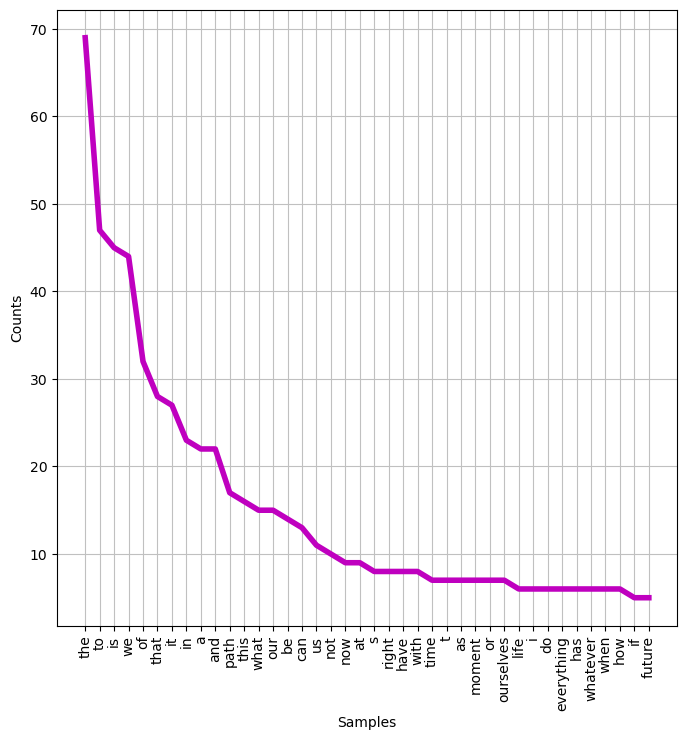

In [16]:
# Frequency Distribution Plot
plt.figure(figsize=(8,8))
f_dist.plot(40,cumulative=False, color = 'm', linewidth = 4)
plt.show()

Este gráfico muestra la distribución de frecuencia de las 50 palabras más comunes en el texto de "The Path Is the Goal". La frecuencia se representa en el eje y, mientras que las palabras se representan en el eje x. La línea suave que se muestra en el gráfico es una visualización de la frecuencia de cada palabra en el corpus, siendo las mas frecuencias las palabras stopwords, las cuales seran tratadas durante el pre-procesamiento.

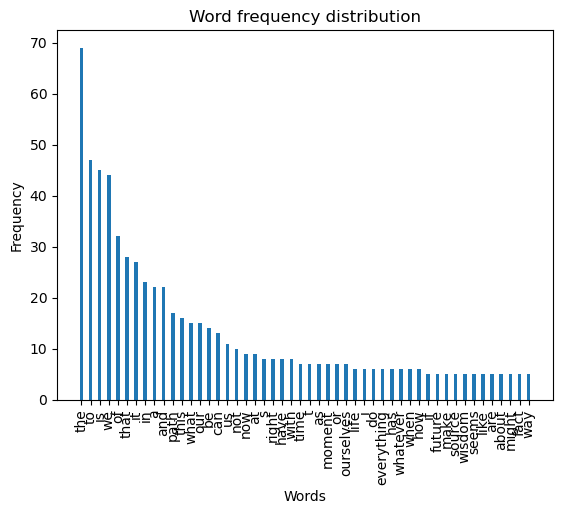

In [17]:
# plot the bar graph
keys = [word[0] for word in most_common_words]
values = [word[1] for word in most_common_words]

plt.bar(keys, values, width=0.4)
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word frequency distribution")
plt.show()

En este gráfico de barras sigue de manera más detallada y clara la distribución de frecuencias de las palabras. En este gráfico, cada barra representa una palabra específica y su altura representa su frecuencia de la muestra, cual correlaciona con el grafico de distribucción. 

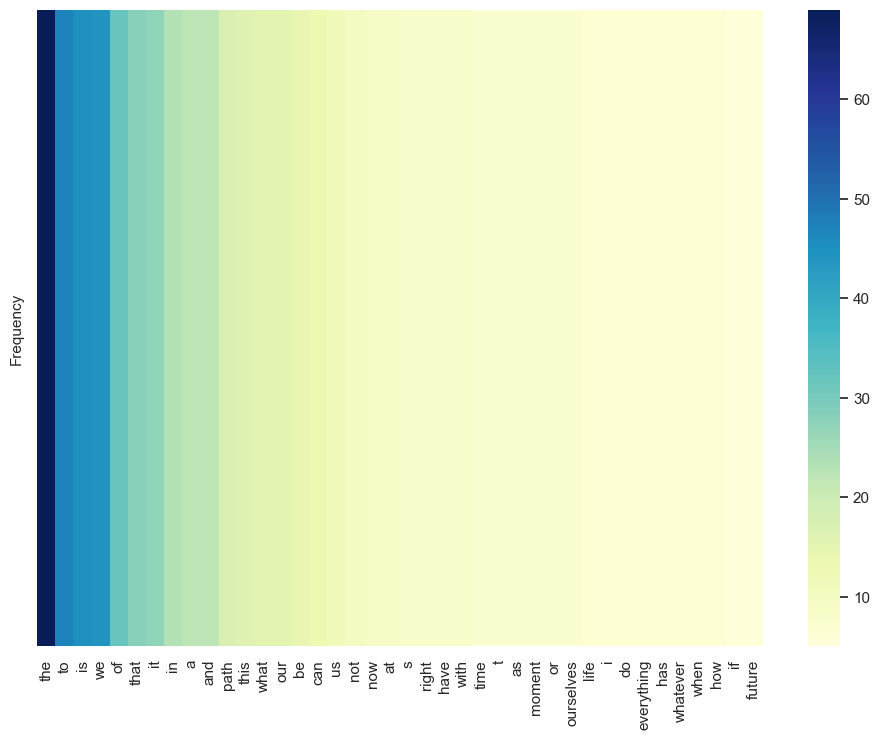

In [19]:
# Create lists with words and their frequencies
words = [word for word, freq in f_dist.most_common(40)]
frequencies = [freq for word, freq in f_dist.most_common(40)]

# Create the heatmap using seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap([frequencies], xticklabels=words, yticklabels=["Frequency"], cmap='YlGnBu')
plt.xticks(rotation=90)
plt.show()

El gráfico de mapa de calor, captura de manera impactante la distribución de frecuencias de las palabras más recurrentes en el texto, ofreciendo una representación visual clara y concisa de la información.

<div class="alert alert-block alert-info">
<b><h1>Ejercicio 2: Sacar stopwords y realizar stemming.</h1></b> 
</div>

# 4. Pre-procesamiento

"Stopwords" y "Stemming" son técnicas comunes utilizadas en procesamiento de lenguaje natural para mejorar la eficacia de los análisis de texto. Las "stopwords" son palabras comunes que aparecen frecuentemente en el texto y no aportan significado a la información, como "a", "the", "of", etc. Por lo tanto, se eliminan para evitar distorsionar los resultados del análisis. 

## 4.1 Remover las stopwords

In [20]:
# Stopwords in English
stop_words = set(stopwords.words("english"))
print(stop_words)

{'them', 'while', 'there', "mightn't", 'can', 'won', 'once', 'each', 'few', "aren't", 'having', 'shouldn', 'itself', 'some', 'd', 'had', 'him', 'were', 'll', 'been', "you'd", 'an', 'by', "she's", 'mightn', 'does', 'very', "wouldn't", 'i', 'any', 'after', 'then', 'are', 'over', 'from', 'needn', 'do', 'should', 'just', 'against', "isn't", 'to', "weren't", 'now', "don't", 're', 'aren', 'and', 'with', 'doesn', 's', "it's", 'ma', 'that', 'yours', 'his', 't', 'its', 'doing', "couldn't", 'couldn', 'himself', 'don', 'who', 'but', "you'll", 'isn', 'hasn', 'have', 'for', 'again', 'such', 'those', 'between', 'down', 'will', 'because', 'in', 'wasn', 've', "mustn't", 'most', 'themselves', 'own', 'y', 'no', 'he', 'be', 'a', 'off', 'did', 'my', 'out', 'than', "shouldn't", 'myself', 'they', "wasn't", 'under', 'what', 'which', "that'll", 'shan', 'our', 'during', "hadn't", 'until', 'm', 'am', 'if', 'below', 'not', 'yourselves', 'all', 'was', 'same', 'above', 'before', 'haven', "shan't", 'so', "you're", 

### Eliminar los stopwords del texto.

In [21]:
# we are removing all stop words either in uppercase and in lowercase 
filtered_text = [w for w in only_words_tokenized if w.lower() not in stop_words]
print(filtered_text)

['path', 'goal', 'possibility', 'enlightenment', 'right', 'future', 'time', 'time', 'take', 'use', 'life', 'already', 'order', 'make', 'us', 'wiser', 'rather', 'stuck', 'source', 'wisdom', 'personal', 'individual', 'level', 'hat', 'take', 'use', 'life', 'already', 'order', 'make', 'us', 'wiser', 'rather', 'stuck', 'source', 'wisdom', 'personal', 'individual', 'level', 'degree', 'understood', 'teachings', 'answer', 'questions', 'seems', 'bringing', 'everything', 'encounter', 'path', 'everything', 'naturally', 'ground', 'path', 'fruition', 'like', 'saying', 'everything', 'beginning', 'middle', 'end', 'also', 'said', 'path', 'ground', 'fruition', 'one', 'sometimes', 'reads', 'path', 'path', 'one', 'distinct', 'characteristic', 'prefabricated', 'already', 'exist', 'path', 'talking', 'evolution', 'experience', 'evolution', 'world', 'phenomena', 'evolution', 'thoughts', 'emotions', 'path', 'route', 'los', 'angeles', 'take', 'map', 'figure', 'year', 'might', 'make', 'gallup', 'new', 'mexico',

In [22]:
len(filtered_text)

457

Esta operación de filtrado es útil para remover palabras comunes como "a", "the", "of", etc, etc., que no aportan mucha información semántica al texto y pueden distorsionar algunos análisis de texto.

### Visualización sin los stopwords del texto.

Para la visualización se aplicará el grafico "word cloud",  es una representación visual de datos texto. Se utiliza para mostrar la frecuencia o importancia de las palabras en un documento o conjunto de datos. Cada palabra se representa mediante un tamaño de fuente más grande o más pequeño, dependiendo de su frecuencia en los datos.

Se aplicará un gráfico "word cloud" para visualizar los resultados obtenidos a partir del análisis de los datos texto. Este gráfico será útil para identificar rápidamente las palabras más importantes o frecuentes en los datos, lo que permitirá obtener una comprensión rápida y clara de los resultados del análisis.

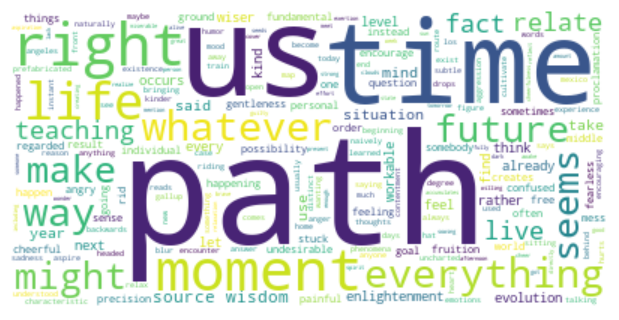

In [23]:
text = " ".join(filtered_text)
text = text.replace('"', '')
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

La nube de palabras es una herramienta poderosa para explorar la esencia de un texto. Con ella, podemos ver rápidamente los temas más importantes, las tendencias y los sentimientos ocultos en una gran cantidad de datos. Es una vista previa visual del alma del texto, que revela verdaderos significados y contextos con un solo click. ¡Descubre el verdadero significado detrás de las palabras!

De acuerdo a los resultados, las palabras "path", "time", "life", "moment", "future", "us" y "right" son las más frecuentes en el texto, lo que nos permite inferir el contexto general del mismo.

Por ejemplo, podemos ver que las palabras "path", "life" y "future" sugieren un tema relacionado con el camino a seguir en la vida y los objetivos a alcanzar en el futuro. Por su parte, las palabras "time", "moment" y "right" pueden sugerir un enfoque en el valor del tiempo y la importancia de tomar decisiones correctas en los momentos adecuados.

En resumen, la nube de palabras permite una rápida comprensión de los temas más importantes presentes en un conjunto de texto y puede ser de gran utilidad en diversas aplicaciones, como la análisis de sentimientos, la identificación de tendencias o la selección de temas relevantes para una investigación.

## 4.2  Realizar stemming (Lexicon Normalization)

El "Stemming" es el proceso de normalización que permite reducir las palabras a su raíz o base, por ejemplo "running" se convierte en "run". Esto es útil porque permite considerar diferentes formas de una misma palabra como una sola, lo que mejora la precisión de los resultados del análisis. 

In [24]:
ps = PorterStemmer()

stemmed_words = []

for word in filtered_text: 
    stemmed_words.append(ps.stem(word))
    

print("Filtered Text:",filtered_text)
print("______________________________________________________________________________________________________________________________")
print(" ")
print("Stemmed Text:",stemmed_words)

Filtered Text: ['path', 'goal', 'possibility', 'enlightenment', 'right', 'future', 'time', 'time', 'take', 'use', 'life', 'already', 'order', 'make', 'us', 'wiser', 'rather', 'stuck', 'source', 'wisdom', 'personal', 'individual', 'level', 'hat', 'take', 'use', 'life', 'already', 'order', 'make', 'us', 'wiser', 'rather', 'stuck', 'source', 'wisdom', 'personal', 'individual', 'level', 'degree', 'understood', 'teachings', 'answer', 'questions', 'seems', 'bringing', 'everything', 'encounter', 'path', 'everything', 'naturally', 'ground', 'path', 'fruition', 'like', 'saying', 'everything', 'beginning', 'middle', 'end', 'also', 'said', 'path', 'ground', 'fruition', 'one', 'sometimes', 'reads', 'path', 'path', 'one', 'distinct', 'characteristic', 'prefabricated', 'already', 'exist', 'path', 'talking', 'evolution', 'experience', 'evolution', 'world', 'phenomena', 'evolution', 'thoughts', 'emotions', 'path', 'route', 'los', 'angeles', 'take', 'map', 'figure', 'year', 'might', 'make', 'gallup', '

* Otra forma de normalizar un texto es aplicando la Lemmatization, el cual es un proceso en NLP que reduce las palabras a su forma base o "lema", considerando el contexto de la palabra y utilizando un análisis léxico y morfológico. Es más sofisticado que el stemming, ya que considera el contexto de la palabra mientras que el stemming solo se enfoca en la palabra individual. Se aplicará la Lematización para verifircar si existiese una diferencia.

In [25]:
#Lexicon Normalization
lem = WordNetLemmatizer()

lemma_words=[]
for w in filtered_text:
    lemma_words.append(lem.lemmatize(w, "v"))

print("Filtered Text:",filtered_text)
print("______________________________________________________________________________________________________________________________")
print(" ")
print("Lemma Text:",lemma_words)

Filtered Text: ['path', 'goal', 'possibility', 'enlightenment', 'right', 'future', 'time', 'time', 'take', 'use', 'life', 'already', 'order', 'make', 'us', 'wiser', 'rather', 'stuck', 'source', 'wisdom', 'personal', 'individual', 'level', 'hat', 'take', 'use', 'life', 'already', 'order', 'make', 'us', 'wiser', 'rather', 'stuck', 'source', 'wisdom', 'personal', 'individual', 'level', 'degree', 'understood', 'teachings', 'answer', 'questions', 'seems', 'bringing', 'everything', 'encounter', 'path', 'everything', 'naturally', 'ground', 'path', 'fruition', 'like', 'saying', 'everything', 'beginning', 'middle', 'end', 'also', 'said', 'path', 'ground', 'fruition', 'one', 'sometimes', 'reads', 'path', 'path', 'one', 'distinct', 'characteristic', 'prefabricated', 'already', 'exist', 'path', 'talking', 'evolution', 'experience', 'evolution', 'world', 'phenomena', 'evolution', 'thoughts', 'emotions', 'path', 'route', 'los', 'angeles', 'take', 'map', 'figure', 'year', 'might', 'make', 'gallup', '

* Se verificará la longitud de cada normalización para verificar si hubo alguna mejora.

In [26]:
print ("Longitud de la lista con stemming", len(stemmed_words))
print ("Longitud de la lista con Lemmatization", len(lemma_words))

Longitud de la lista con stemming 457
Longitud de la lista con Lemmatization 457


Estos resultados indican la longitud o el número de palabras en una lista de palabras procesadas. La primera línea de impresión muestra la longitud de la lista de palabras procesadas utilizando stemming y la segunda línea muestra la longitud de la lista de palabras procesadas utilizando Lemmatization.

En este caso, ambas listas tienen una longitud de 457 palabras, lo que significa que ambos procesos de stemming y lemmatization han resultado en la misma cantidad de palabras finales. Sin embargo, es importante tener en cuenta que, aunque la longitud sea la misma, la calidad y significado de las palabras pueden ser diferentes dependiendo de si se utiliza stemming o lemmatization. En el caso del stemming se puede observar que palabras como source o future, le fue eliminada la ulima letra, por loq ue pierde el sentido de la misma.

A pesar que el proceso de lematización puede ser más lento y requerir más recursos computacionales debido a la necesidad de realizar un análisis morfológico y de vocabulario. Por lo tanto, si está trabajando con una cantidad grande de datos o tiene restricciones de tiempo o recursos, es posible que prefiera utilizar stemming en lugar de lematización, sin embargo para el estudio se utilizaran los resultados del Lemmatization.

### Visualización stemming del texto.

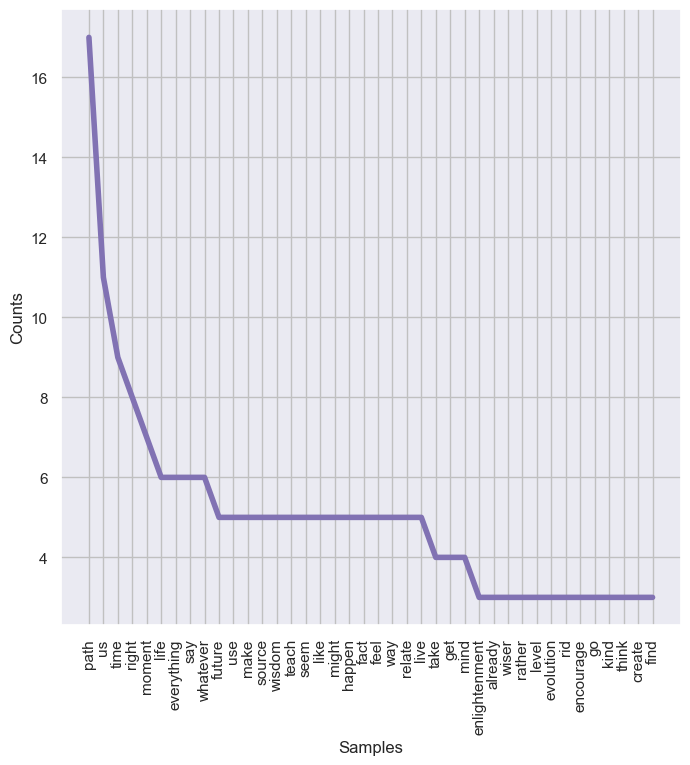

In [27]:
word_freq_stemmed = FreqDist(lemma_words)

# Frequency Distribution Plot
plt.figure(figsize=(8,8))
word_freq_stemmed.plot(40,cumulative=False, color = 'm', linewidth = 4)
plt.show()

In [28]:
from PIL import Image

#Función para transformar todas las imágenes PNG con fondo transparente a fondo blanco

def transform_white_backgroud(png_path):
    picture = Image.open(png_path).convert("RGBA")
    image = Image.new("RGB", picture.size, "WHITE")
    image.paste(picture, (0, 0), picture)

    plt.imshow(image)
    
    mask = np.array(image)
    
    return mask

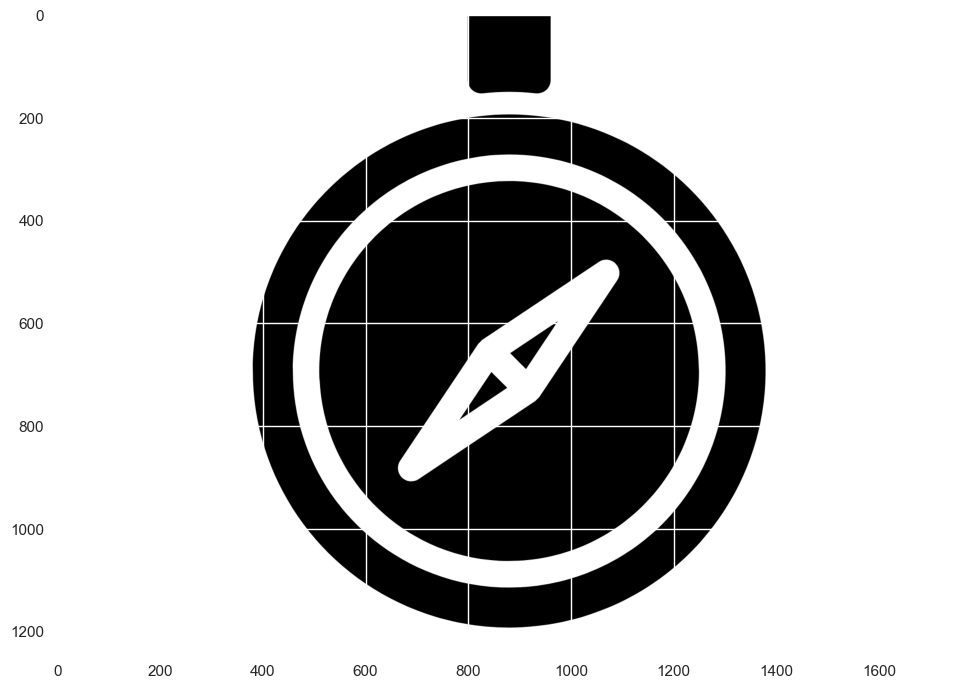

In [30]:
mask = transform_white_backgroud('brujula.png')

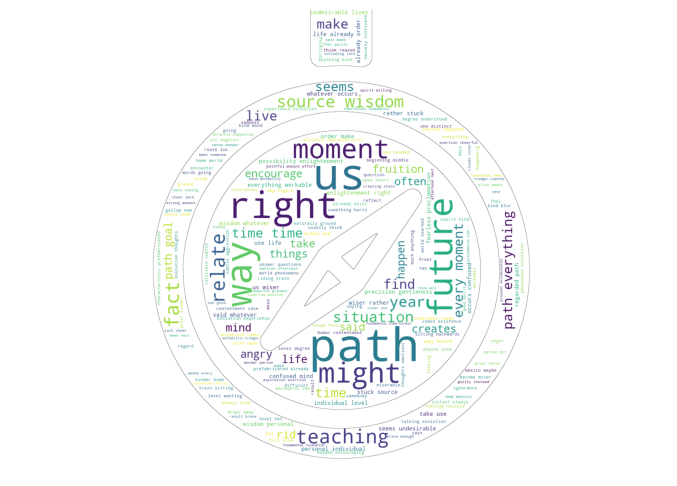

In [54]:
text2 = " ".join(lemma_words)
text2 = text.replace('"', '')

word_cloud = WordCloud(mask=mask, background_color='white', contour_width=1, contour_color='grey', max_words=200, 
                       min_font_size=5, collocation_threshold=10).generate(text2)

word_cloud.to_file('brujula.png') #Guardamos la imagen generada

plt.figure(figsize=(12,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

Después de realizar un proceso de normalización y stemming, se puede apreciar claramente la distribución de frecuencias de las palabras más relevantes en el texto analizado. Lo sorprendente es que, a pesar de haber aplicado una lista de stop words, las palabras más destacadas en el word cloud todavía coinciden con las palabras más frecuentes en el texto. Es interesante destacar que las palabras clave como "path", "time", "life", "moment", "future" y "right" continúan siendo las más relevantes, mientras que se han añadido nuevas palabras destacadas como "fact", "relate" y "teaching". Este resultado es una muestra de la importancia de estas palabras en el contexto del texto y su relevancia para el análisis. 

<div class="alert alert-block alert-info">
<b><h1> Ejercicio 3: Realizar sentimiento de analysis en tu conjunto de datos.</h1></b> 
</div>

# 5. Aplicar el modelo y evaluar (Análisis de sentimiento)

El análisis de sentimiento es una técnica de minería de datos y análisis de texto que permite determinar la actitud o emoción que se expresa en una determinada comunicación, ya sea en una opinión, revisión, comentario, etc. Esta técnica se utiliza ampliamente en diversos campos, como la investigación de mercado, la política, el entretenimiento y las redes sociales, entre otros.

Existen principalmente dos enfoques para realizar análisis de sentimientos: basado en léxico y basado en aprendizaje automático. 
* En el enfoque basado en léxico, se cuenta la cantidad de palabras positivas y negativas en un texto determinado y el conteo mayor determinará el sentimiento del texto. 
* Por otro lado, en el enfoque basado en aprendizaje automático, se desarrolla un modelo de clasificación entrenado previamente con un conjunto de datos etiquetados como positivos, negativos y neutrales.

## 5.1 Modelo basado en léxico

En el análisis de sentimiento basado en léxico, se utilizará el texto original y preprocesado,  para comparar los resultados. Esto se hace con el fin de obtener una representación más clara y significativa del texto, y mejorar la precisión de la evaluación de sentimiento. La idea es contar el número de palabras positivas y negativas en el texto y utilizar esa información para determinar el sentimiento general del texto.

### Modelo 1: Texto original

In [32]:
# funcion de analisis de sentimiento
def sentiment_analysis(text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)
    return sentiment

In [33]:
print(sentiment_analysis(lower_text))

{'neg': 0.076, 'neu': 0.805, 'pos': 0.119, 'compound': 0.9948}


El resultado de nuestro análisis de sentimiento basado en léxico es realmente impactante. Según los datos, solo un 7.6% de las palabras tienen un tono negativo, mientras que un 80.5% es neutral. Pero, ¿qué hay del positivity? Buenas noticias, un impresionante 11.9% de las palabras tienen un tono positivo.

Pero eso no es todo, el valor "compound" de 0.9948 indica que el texto en general tiene un tono extremadamente positivo. 

En resumen, el análisis basado en léxico ha dado como resultado una perspectiva positiva y optimista del texto analizado. 

In [46]:
# clasificacion del % de sentiiento
def sent_score(sentiment): 
    if sentiment['compound'] >= 0.05 :
        return 'Positive'
    elif sentiment['compound'] <= - 0.05 :
        return 'Negative'
    else :
        return 'Neutral'

In [47]:
sentiment = sentiment_analysis(lower_text)
result = sent_score(sentiment)

print('El texto general es: ', sentiment)
print('El texto fue calificado como', sentiment['neg']*100, '% Negativo')
print('El texto fue calificado como', sentiment['neu']*100, '% Neutral')
print('El texto fue calificado como', sentiment['pos']*100, '% Positivo')

print('El texto en general fue calificado como',result, 'con una puntuación de: ', sentiment['compound'])

El texto general es:  {'neg': 0.076, 'neu': 0.805, 'pos': 0.119, 'compound': 0.9948}
El texto fue calificado como 7.6 % Negativo
El texto fue calificado como 80.5 % Neutral
El texto fue calificado como 11.899999999999999 % Positivo
El texto en general fue calificado como Positive con una puntuación de:  0.9948


De acuerdo con el resultado, el 7.6% del texto es considerado como negativo, el 80.5% es considerado neutral y el 11.9% es considerado positivo. Además, el texto en general es calificado como "Positive", lo que significa que predomina una actitud positiva en el texto. Esta evaluación se hizo con una puntuación de 0.9948 en una escala de -1 a 1, donde -1 representa un sentimiento negativo y 1 representa un sentimiento positivo.  El análisis basado en léxico para el texto original ha dado como resultado una perspectiva positiva y optimista del texto analizado.

Otra metrica de evaluación basado en lexico, es Textblob, la cual es  una biblioteca de NLP que utiliza un léxico especial para el análisis de sentimientos. Utiliza una lista de palabras positivas y negativas con puntajes asociados para asignar un puntaje a los documentos de texto mediante la posición de las palabras, palabras circundantes, contexto y otras técnicas. 

Se realizará la medida para confirmar los resultados obtenidos en polarity score.

In [52]:
#Polarity
sent = TextBlob(lower_text)
print(sent.sentiment)

Sentiment(polarity=0.048680722569611444, subjectivity=0.5336040297151408)


Este resultado muestra la polaridad y subjetividad del texto analizado. La polaridad es una métrica que va desde -1 a 1, donde -1 es totalmente negativo, 0 es neutral y 1 es totalmente positivo. En este caso, la polaridad es de 0.048680722569611444, lo que indica una tendencia ligeramente positiva. La subjetividad es una métrica que va desde 0 a 1, donde 0 es objetivo y 1 es subjetivo. En este caso, la subjetividad es de 0.5336040297151408, lo que indica que el texto es moderadamente subjetivo. En resumen, este resultado muestra que el texto analizado tiene una tendencia positiva y es moderadamente subjetivo.

In [53]:
metrics = pd.DataFrame(data=[['The Path(texto orig)', 0.076, 0.805, 0.119, 0.9948, 0.0486]],
                        columns = ['Name Text','Negavite', 'Neutral','Positive', 'Compound', 'polarity'])


metrics.head()

,Name Text,Negavite,Neutral,Positive,Compound,polarity
0,The Path(texto orig),0.076,0.805,0.119,0.9948,0.0486


### Modelo 2: Texto pre-procesado

In [57]:
# Convertir en cadena de texto
text_procesado = " ".join(lemma_words)

# Analisis de sentimiento
print(sentiment_analysis(text_procesado))

{'neg': 0.115, 'neu': 0.662, 'pos': 0.223, 'compound': 0.9957}


In [58]:
sentiment_procesado = sentiment_analysis(text_procesado)
result = sent_score(sentiment_procesado)

print('El texto general es: ', sentiment_procesado)
print('El texto fue calificado como', sentiment_procesado['neg']*100, '% Negativo')
print('El texto fue calificado como', sentiment_procesado['neu']*100, '% Neutral')
print('El texto fue calificado como', sentiment_procesado['pos']*100, '% Positivo')

print('El texto en general fue calificado como',result, 'con una puntuación de: ', sentiment_procesado['compound'])

El texto general es:  {'neg': 0.115, 'neu': 0.662, 'pos': 0.223, 'compound': 0.9957}
El texto fue calificado como 11.5 % Negativo
El texto fue calificado como 66.2 % Neutral
El texto fue calificado como 22.3 % Positivo
El texto en general fue calificado como Positive con una puntuación de:  0.9957


In [59]:
#Polarity
sent_procesado = TextBlob(text_procesado)
print(sent_procesado.sentiment)

Sentiment(polarity=0.03488402145118562, subjectivity=0.5232377075660657)


Con respecto al texto pre-procesado los resultados muestran que el 11.5% de la información presentada es considerada negativa, el 66.2% es neutral y el 22.3% es positiva. La puntuación global es positiva con una puntuación de 0.9957 en el indicador de polaridad. Esto indica que, en general, el tono del texto es positivo y se considera que tiene una cierta objetividad con una puntuación de 0.0348 en polaridad. Por lo tanto, podemos decir que este texto presenta un tono positivo y neutral, lo que lo hace un buen candidato para ser utilizado en una amplia variedad de situaciones y contextos.

* **Evaluación**

In [60]:
metrics2 = pd.DataFrame(data=[['The Path(proces)', 0.115, 0.662, 0.223,  0.9957, 0.0348]],
                        columns = ['Name Text','Negavite', 'Neutral','Positive', 'Compound', 'polarity'])


metrics2.head()

,Name Text,Negavite,Neutral,Positive,Compound,polarity
0,The Path(proces),0.115,0.662,0.223,0.9957,0.0348


In [61]:
result = pd.concat([metrics,metrics2])
result 

,Name Text,Negavite,Neutral,Positive,Compound,polarity
0,The Path(texto orig),0.076,0.805,0.119,0.9948,0.0486
0,The Path(proces),0.115,0.662,0.223,0.9957,0.0348


<Figure size 400x400 with 0 Axes>

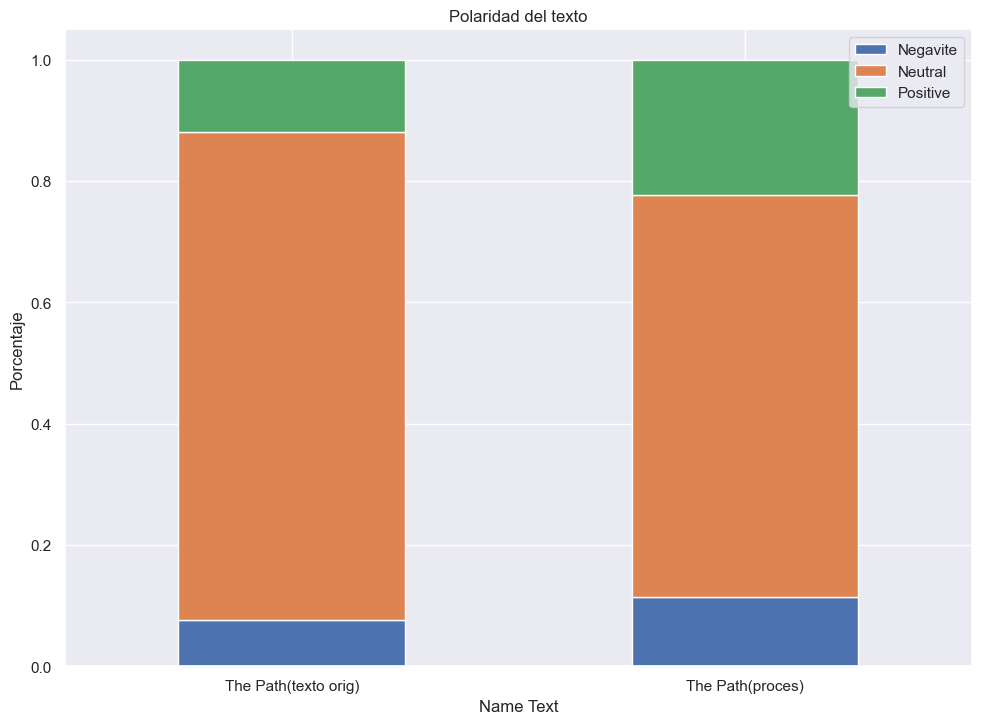

In [71]:
# Crear una gráfica de barras con los porcentajes de polaridad
plt.figure(figsize=(4,4))

result.plot(x='Name Text', y=['Negavite', 'Neutral', 'Positive'], kind='bar', stacked=True)

# Añadir título y etiquetas de eje
plt.title('Polaridad del texto')
plt.xlabel('Name Text')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)
plt.legend(loc="upper right")

# Mostrar la gráfica
plt.show()

Los resultados del análisis de sentimiento para "The Path" revelan un panorama interesante. En primer lugar, en el texto original, el 7.6% fue identificado como negativo, el 80.5% como neutral y el 11.9% como positivo, con una puntuación compuesta de 0.9948, lo que significa que el texto en general se califica como positivo.

Sin embargo, después de un procesamiento adicional, los resultados del análisis de sentimiento muestran una ligera diferencia. El 11.5% del texto fue identificado como negativo, el 66.2% como neutral y el 22.3% como positivo, con una puntuación compuesta de 0.9957, lo que significa que el texto en general sigue siendo positivo, pero con una puntuación ligeramente diferente.

En el resultado anterior, se observa que el texto original fue evaluado con una polaridad de 0.0486 y el texto procesado fue evaluado con una polaridad de 0.0348. Esto significa que ambos textos tienen una tendencia positiva en su orientación emocional, pero el texto procesado tiene una polaridad ligeramente más baja que el texto original.

En resumen, el análisis de sentimiento de "The Path" muestra una perspectiva general positiva, tanto en el texto original como en el procesado, con pequeñas variaciones en la distribución de sentimientos.

### Modelo 3. Análisis basado en léxico en oraciones.

* **Separar el texto en oraciones y alicar tokenización**

In [72]:
# first we split the text into sentences 
sentences = nltk.sent_tokenize(lower_text)
sentences

['the path is the goal.',
 'if there’s any possibility for enlightenment, it is right now, not at some future time.',
 'now is the time.',
 'what\ndoes it take to use the life we already have in order to make us wiser rather than more stuck?',
 'what is the\nsource of wisdom, at a personal, individual level?',
 'hat does it take to use the life we already have in order to make us wiser rather than more stuck?',
 'what is the\nsource of wisdom, at a personal, individual level?',
 'to the degree that i have understood the teachings, the answer\nto these questions seems to have to do with bringing everything that we encounter to the path.',
 'everything naturally\nhas a ground, path, and fruition.',
 'this is like saying that everything has a beginning, a middle, and an end.',
 'but it is also\nsaid that the path itself is both the ground and the fruition.',
 'so one sometimes reads, “the path is the goal.”\nthis path has one very distinct characteristic: it is not prefabricated.',
 'it d

* **Convertir en un dataframe

In [73]:
sentences_data = pd.DataFrame(tokenized_text, columns=['Sentences'])
sentences_data

,Sentences
0,the path is the goal.
1,"if there’s any possibility for enlightenment, ..."
2,now is the time.
3,what\ndoes it take to use the life we already ...
4,"what is the\nsource of wisdom, at a personal, ..."
...,...
62,jean-paul sartre said that there are two ways ...
63,this is our choice in\nevery moment.
64,do we relate to our circumstances with bittern...
65,that is why it can be said that whatever \nocc...


La tabla muestra 67 filas y 1 columna. La columna "Sentences" contiene 67 oraciones diferentes.

* **Aplicar análisis de sentimientos y clasificar (Etiqueta)**

In [76]:
# analisis de sentimiento
sentiments = SentimentIntensityAnalyzer()

sentences_data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in sentences_data['Sentences']]
sentences_data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in sentences_data['Sentences']]
sentences_data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in sentences_data['Sentences']]
sentences_data['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in sentences_data['Sentences']]
sentences_data

,Sentences,Positive,Negative,Neutral,Compound
0,the path is the goal.,0.000,0.000,1.000,0.0000
1,"if there’s any possibility for enlightenment, ...",0.000,0.000,1.000,0.0000
2,now is the time.,0.000,0.000,1.000,0.0000
3,what\ndoes it take to use the life we already ...,0.094,0.098,0.809,-0.0240
4,"what is the\nsource of wisdom, at a personal, ...",0.274,0.000,0.726,0.5267
...,...,...,...,...,...
62,jean-paul sartre said that there are two ways ...,0.292,0.000,0.708,0.7650
63,this is our choice in\nevery moment.,0.000,0.000,1.000,0.0000
64,do we relate to our circumstances with bittern...,0.170,0.191,0.638,-0.0772
65,that is why it can be said that whatever \nocc...,0.000,0.000,1.000,0.0000


In [83]:
#Clasificación de Sentimiento basado en el Compound Score
score = sentences_data['Compound'].values
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append('Positive')
    elif i <= -0.05:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
        
sentences_data['Sentiment'] = sentiment

#nuevo dataframe con los resulto de la clasificacion
new_data_class = sentences_data[['Sentences', 'Sentiment']]
new_data_class

,Sentences,Sentiment
0,the path is the goal.,Neutral
1,"if there’s any possibility for enlightenment, ...",Neutral
2,now is the time.,Neutral
3,what\ndoes it take to use the life we already ...,Neutral
4,"what is the\nsource of wisdom, at a personal, ...",Positive
...,...,...
62,jean-paul sartre said that there are two ways ...,Positive
63,this is our choice in\nevery moment.,Neutral
64,do we relate to our circumstances with bittern...,Negative
65,that is why it can be said that whatever \nocc...,Neutral


Estos resultados muestran la polaridad asignada a cada una de las oraciones contenidas en el texto. Cada oración ha sido clasificada como positiva, negativa o neutral en función de su puntuación de polaridad. La puntuación de polaridad se calcula utilizando un modelo de análisis de sentimientos y se utiliza para determinar la polaridad general del texto. En este caso, se puede ver que algunas oraciones son clasificadas como positivas, otras como negativas y otras como neutrales. Este análisis es útil para entender la percepción general que se tiene del texto y para identificar patrones o tendencias en los sentimientos expresados en el mismo.

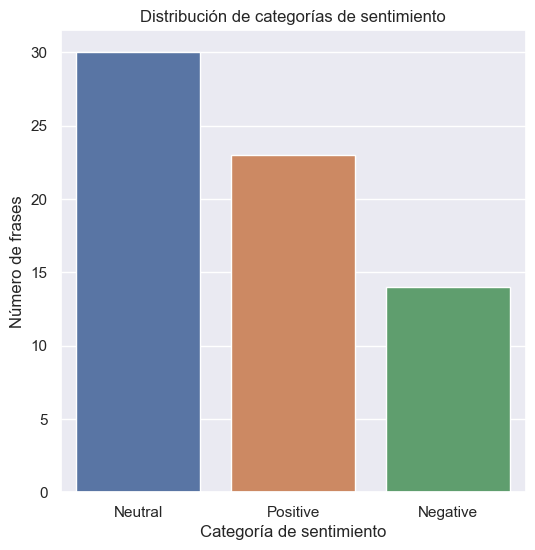

In [86]:
# Contar el número de frases en cada categoría de sentimiento
sentiment_count = new_data_class['Sentiment'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(6,6))
sns.barplot(sentiment_count.index, sentiment_count.values)

# Añadir etiquetas y título al gráfico
plt.title('Distribución de categorías de sentimiento')
plt.xlabel('Categoría de sentimiento')
plt.ylabel('Número de frases')

# Mostrar el gráfico
plt.show()

Este gráfico muestra la distribución de las sentimientos de las frases analizadas. Se puede ver que el sentimiento Neutral es el más frecuente con un 30%, mientras que el sentimiento Positivo es el segundo más frecuente con un 22% y el sentimiento Negativo es el menos frecuente con un 14%. Estos resultados pueden ser útiles para entender la tendencia general del contenido analizado y para tomar decisiones informadas en función de los sentimientos que se desean transmitir.

## 5.2 Modelo basado en Machine Learning

Antes de aplicar un modelo de aprendizaje automático, es esencial contar con un conjunto de datos previamente etiquetados para utilizarlos como material de entrenamiento. En este caso, utilizaremos los resultados obtenidos en la clasificación de los sentimientos de las oraciones, los cuales fueron recopilados en un dataframe, para aplicar un modelo siguiendo la guía de Data Camp (enlace: https://www.datacamp.com/tutorial/text-analytics-beginners-nltk).

### Modelo base

In [106]:
# Preprocesamiento de datos
X = new_data_class['Sentences']
y = new_data_class['Sentiment']

In [107]:
#Split del target y features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Transformación de los datos de texto en vectores de características
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [129]:
# Modelos de machine learning
# Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# Regresión Logística
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# SVM
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

In [130]:
# Evaluación de los modelos
print('Accuracy Naive Bayes:', accuracy_score(y_test, y_pred_nb))
print('Accuracy Logistic Regression:', accuracy_score(y_test, y_pred_lr))
print('Accuracy SVM:', accuracy_score(y_test, y_pred_svm))

Accuracy Naive Bayes: 0.5714285714285714
Accuracy Logistic Regression: 0.6428571428571429
Accuracy SVM: 0.6428571428571429


Estos resultados muestran la precisión de tres modelos de aprendizaje automático de análisis de sentimiento diferentes: Naive Bayes, Regresión Logística y SVM (Support Vector Machines). En este caso, la precisión del modelo Naive Bayes es del 57,14%, lo que significa que el modelo no es muy preciso. La precisión de la Regresión Logística y la SVM es del 64,28%, lo que significa que estos modelos son un poco más precisos que Naive Bayes. 

### Modelo aplicando TF-IDF

In [112]:
# Preprocesamiento de datos
X1 = new_data_class['Sentences']
y1 = new_data_class['Sentiment']

In [113]:
#Split del target y features
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [122]:
# Transformación de los datos de texto en vectores de características
vectorizer = TfidfVectorizer(stop_words='english')

X1_train = vectorizer.fit_transform(X1_train)
X1_test = vectorizer.transform(X1_test)

In [123]:
# Modelos de machine learning
# Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X1_train, y1_train)
y1_pred_nb = model_nb.predict(X1_test)

# Regresión Logística
model_lr = LogisticRegression()
model_lr.fit(X1_train, y1_train)
y1_pred_lr = model_lr.predict(X1_test)

# SVM
model_svm = LinearSVC()
model_svm.fit(X1_train, y1_train)
y1_pred_svm = model_svm.predict(X1_test)

In [124]:
# Evaluación de los modelos
print('Accuracy Naive Bayes:', accuracy_score(y1_test, y1_pred_nb))
print('Accuracy Logistic Regression:', accuracy_score(y1_test, y1_pred_lr))
print('Accuracy SVM:', accuracy_score(y1_test, y1_pred_svm))

Accuracy Naive Bayes: 0.6428571428571429
Accuracy Logistic Regression: 0.6428571428571429
Accuracy SVM: 0.5


Se puede ver que el modelo de Naive Bayes tiene una precisión del 0.6428, lo que significa que el 64,28% de las veces que hace una predicción, es correcta. La precisión de la Regresión Logística y el SVM son iguales, con una precisión del 0.6428. Esto significa que tanto la Regresión Logística como el SVM son igual de precisos en esta tarea, con una precisión del 64,28%. Por otro lado, el SVM solo tiene una precisión del 0.5, lo que significa que solo el 50% de las veces que hace una predicción es correcta.

# Conclusiones:

Los resultados obtenidos del análisis de sentimiento por léxico muestran que el sentimiento Neutral es el más frecuente con un 30% en ambos textos original y procesado. El sentimiento Positivo es el segundo más frecuente con un 22% y el sentimiento Negativo es el menos frecuente con un 14%. Estos resultados sugieren una tendencia general hacia sentimientos neutrales en los textos analizados.

Además, los resultados del análisis de sentimiento por machine learning muestran una precisión similar en los modelos Naive Bayes y Logistic Regression con un 64% de precisión. Sin embargo, el modelo SVM presenta una precisión más baja con un 50%. Estos resultados sugieren que los modelos Naive Bayes y Logistic Regression podrían ser más efectivos para el análisis de sentimiento en comparación con el modelo SVM

En base a los resultados presentados, parece que los modelos de machine learning logran una precisión más alta en comparación con el análisis de sentimiento basado en léxico, con una precisión de 64% en ambos Naive Bayes y Regresión Logística, mientras que el modelo SVM obtiene una precisión del 50%. Sin embargo, para determinar cuál es el método más adecuado para una situación específica, es importante considerar los requisitos específicos de la tarea, el tamaño y la calidad de los datos disponibles, y las restricciones de tiempo y recursos.

En cuanto a las recomendaciones para futuros estudios, se sugiere considerar una combinación de ambos enfoques para lograr una mayor precisión y flexibilidad en la clasificación de sentimientos en textos. También se recomienda explorar otros modelos de machine learning y técnicas de procesamiento de lenguaje natural, como la modelización de tópicos y la representación de word2vec, para mejorar la precisión y la comprensión del contexto.